# Cap_1

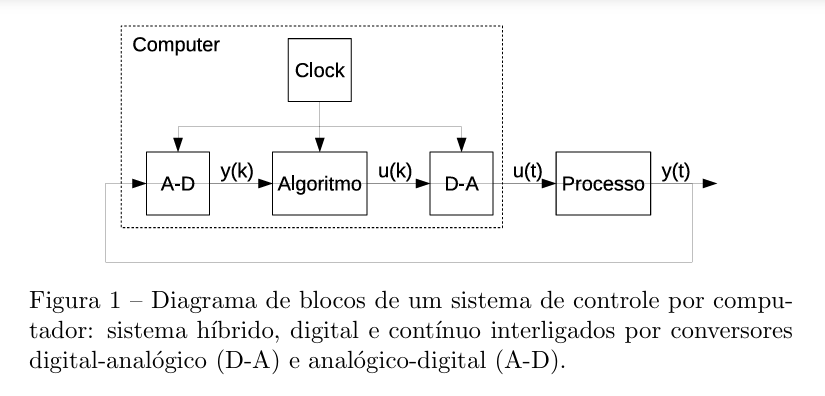


 O intervalo em que o conversor D-A permanece em hold até que toda essa sequência se repita para a chegada de uma nova conversão D-A, caracteriza as restrições de projeto e análise de controladores digitais e os diferencia da análise contínua. Nesse período em que o controlador permanece em hold, denominado período de amostragem, o processo controlado está em malha aberta (MA), portanto é fundamental que esse intervalo seja apropriadamente selecionado e levado em conta para
 fins de análise de desempenho e estabilidade da malha de controle.

O período de amostragem também pode ser representado em
função da frequência ou taxa de amostragem ($f_s = 1/T_s\,Hz$ ou $ω_s =2π/Ts\,rad/s$). Essas informaçõe são os elos entre os domínios de análise contínuo e discreto e permitem estabelecer os mapas de equivalência entre eles através de aproximações e a Transformada $Z$.

##### Regra Prática

* Para um Sistemade Controle em malha fechada: o critério prático proposto por Astrom e Wittenmark (2011) é de que a frequência de amostragem $ω_s$ seja ao menos o dobro do mínimo exigido pelo Teorema de Nyquist: $ω_s ⩾ 4ω_i$.

Digitalização de um modelo contínuo:Cada pólo determina uma frequência crítica do sistema.

#### Transformada Z

$F(z) = \mathcal{Z}[f(t)] = \mathcal{Z}[f(kT_s)] = \sum_{k=0}^{\infty} f(kT_s)z^{-k}$

#### Aproximação pelo Segurador de Ordem Zero 

Colocado no início do processo. (Amostragem
)

